In [478]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, train_test_split, cross_validate
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error, SCORERS

pd.set_option('display.max_columns', None)

# 0) Big Picture

# 1) Get data

### - Create Environment

### - Download Data (optional)

### - Load Data

In [479]:
filename1 = '/Users/test/Documents/MBAN/kaggle/house_price/data/train.csv'
filename2 = '/Users/test/Documents/MBAN/kaggle/house_price/data/test.csv'
df_original = pd.read_csv(filename1, index_col=0)
df_unknown_original = pd.read_csv(filename2, index_col=0)

# 2) Quick Glance

In [480]:
# Data copied for EDA
df_train_EDA = df_train_original.copy()

In [481]:
df_train_EDA.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### - Statistics

In [482]:
#df_train_EDA.info()

In [483]:
df_train_EDA['Condition1'].value_counts()

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [484]:
df_train_EDA.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [485]:
#df_train_EDA.drop(
#    columns=['1stFlrSF', 'GarageYrBlt', 'GrLivArea', 'LotFrontage','LotArea', 'SalePrice', 'YearBuilt', 'BedroomAbvGr', 
#             'BsmtFullBath', 'BsmtHalfBath']).hist(bins=50,
#                                                                                                           figsize=(20, 15))
#plt.show()

## Findings:
- Meaningful Missing values for categorical features
- Too many 0s for many numerical features

In [486]:
#df_train['GarageCond'].value_counts()

### - Create a Test Set

In [487]:
df = df_original.copy()
df_X = df.drop(columns='SalePrice')
df_y = df[['SalePrice']]

In [488]:
df_X_train, df_X_test, df_y_train, df_y_test = train_test_split(df_X, df_y, random_state=5, test_size=0.3)
y_train = df_y_train.values.flatten()
y_test = df_y_test.values.flatten()

# 3) EDA & Insights

In [489]:
#df_train_EDA = df_X_train.copy().stack(df_y_train.copy())
df_train_EDA = pd.concat([df_X_train.copy(), df_y_train.copy()], axis=1)
#print(df_X_train.copy().shape)
#print(df_y_train.copy().shape)
#print(df_train_EDA.shape)

## - Scatterplots

In [490]:
#pd.plotting.scatter_matrix(df_train_EDA.select_dtypes(exclude=['O']), figsize=(12,8))
#plt.show()

### - Correlations

In [491]:
# correlation with y
corr_matrix = df_train_EDA.corr()
#corr_matrix['SalePrice'].sort_values(ascending=False)

## Top 5 features highly correlated with SalePrice: 
 - OverallQual 
 - GrLivArea 
 - GarageCars
 - GarageArea
 - TotalBsmtSF

In [492]:
# correlation pairs ranked
#df_train_EDA.corr().unstack().sort_values(ascending=False).drop_duplicates()

### - Experimenting with Attribute Combos

# 4) Pipelines

In [493]:
# helper functions

In [494]:
# Data copied for preprocessing and training

### - Separating numeric and categorical features

In [495]:
# features to delete
X_too_many_NA = ['Alley', 'FirePlaceQu', 'PoolQC', 'Fence', 'MiscVal']
numeric_X_too_many_zero = ['2ndFlrSF', '3SsnPorch', 'BsmtFinSF2', 'EnclosedPorch', 'LowQualFinSF', 'MiscVal', 'PoolArea', 
                           'OpenPorchSF', 'ScreenPorch']

X_to_delete = list(set(X_too_many_NA) | set(numeric_X_too_many_zero))
print(X_to_delete)

['Alley', 'PoolQC', '3SsnPorch', 'LowQualFinSF', 'EnclosedPorch', 'PoolArea', 'Fence', 'ScreenPorch', 'MiscVal', 'OpenPorchSF', 'BsmtFinSF2', 'FirePlaceQu', '2ndFlrSF']


In [496]:
# retrieve variable names
numeric_X = pd.read_csv('numeric_X.csv', index_col=0).values.flatten().tolist()
categorical_X = pd.read_csv('categorical_X.csv', index_col=0).values.flatten().tolist()
#print(numeric_X)
#print(len(categorical_X))
#print(list(set(X_to_delete).intersection(set(numeric_X))))
for i in list(set(X_to_delete).intersection(set(numeric_X))):
    numeric_X.remove(i)
print(len(numeric_X))
for i in list(set(X_to_delete).intersection(set(categorical_X))):
    categorical_X.remove(i)
print(len(categorical_X))
#numeric_X.remove(['LowQualFinSF', 'OpenPorchSF', 'PoolArea', 'BsmtFinSF2', 'EnclosedPorch', '3SsnPorch', 'MiscVal', 'ScreenPorch', '2ndFlrSF'])

19
48


## a. full_pipe_base: Basic Processing  

In [497]:
numeric_pipe = Pipeline([
    ('impute', SimpleImputer(missing_values=np.nan, strategy='median')),
    ('standardize', StandardScaler())])

categorical_pipe = Pipeline([
    ('impute', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
    ('OHE', OneHotEncoder(categories='auto',sparse=False, handle_unknown='ignore', dtype=int))
    ])

full_pipe_base = ColumnTransformer([ 
    ("numeric_pipe", numeric_pipe, numeric_X),
    ("categorical_pipe", categorical_pipe, categorical_X),
    ])

# 5) Model Selection & Training

### - Shortlist 2 - 5 algoritms using cross validation

In [498]:
pipelines = []
#pipelines.append(('ScaledLR', Pipeline([('Scaler', full_pipe_base),('LR', LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', full_pipe_base),('LASSO', Lasso())])))
pipelines.append(('ScaledRIDGE', Pipeline([('Scaler', full_pipe_base),('RIDGE', Ridge())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', full_pipe_base),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', full_pipe_base),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', full_pipe_base),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', full_pipe_base),('SVR', SVR(gamma='auto'))])))

In [499]:
train_scores = []
test_scores = []
names = []
num_folds = 5
seed = 5
scoring = 'neg_mean_squared_error'
#scoring = 'r2'
for name, model in pipelines:
    # define how to split off validation data
    kfold= KFold(n_splits=num_folds, random_state=seed)
    # train the model
    cv_results= cross_validate(model, df_X_train, y_train, cv=kfold, scoring=scoring, return_train_score=True)
    train_scores.append(cv_results['train_score'])
    test_scores.append(cv_results['test_score'])
    names.append(name)
    msg= "%s: %f (%f)" % (name, cv_results['test_score'].mean(), cv_results['test_score'].std())
    print(msg)

/anaconda3/envs/project_environment/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12076125448.858276, tolerance: 558751624.262297
  positive)
/anaconda3/envs/project_environment/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2822483757.0559387, tolerance: 534505489.8138198
  positive)
/anaconda3/envs/project_environment/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6954032160.451111, tolerance: 526737299.3414002
  positive)
/anaconda3/envs/project_environment/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective

ScaledLASSO: -2106830391.213155 (1384592792.040933)
ScaledRIDGE: -1619627539.566359 (986125344.071437)
ScaledEN: -1497027103.513614 (664858953.726377)
ScaledKNN: -1247346222.346977 (289147733.224941)
ScaledCART: -2249315316.567312 (690647440.673540)
ScaledSVR: -7002633070.618128 (654766495.882875)


In [500]:
print(results)

[{'fit_time': array([0.52053308, 0.56085896, 0.50673485, 0.52786708, 0.52696705]), 'score_time': array([0.01877403, 0.0184989 , 0.01593113, 0.01565385, 0.01565385]), 'test_score': array([-4.84774343e+09, -1.20524397e+09, -1.27609470e+09, -1.77756926e+09,
       -1.42750060e+09])}]


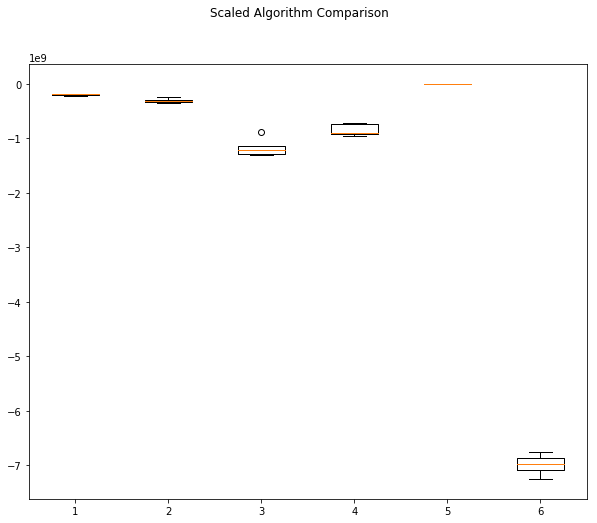

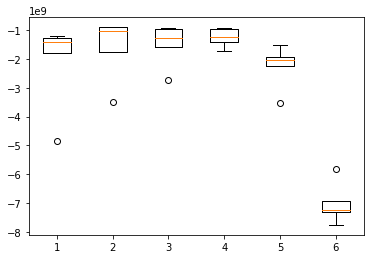

In [501]:
fig = plt.figure(figsize=(10, 8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(train_scores)
plt.show()
fig = plt.figure(figsize=(10, 8))
plt.boxplot(test_scores)
ax.set_xticklabels(names)
#plt.ylim([-1e+29, 0.1e+29])
plt.show()

In [502]:
#X_test_proc.shape

X_train_proc = full_pipe_base.fit_transform(df_X_train)
X_test_proc = full_pipe_base.transform(df_X_test)
tree = DecisionTreeRegressor()
tree.fit(X_train_proc, y_train)
print(tree.score(X_train_proc, y_train))
print(tree.score(X_test_proc, y_test))

# 6) Hyperparameter Tuning

### - Grid Search

### - Randomized Search

### - Ensemble Methods

### - Evaluate on Test set

# 7) Present Solution

# 8) Launch model

### - Deploy Model